In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 6CA3-2EE7

 Directory of C:\Users\gokul\OneDrive\Documents\excelr\project\data

13-04-2022  09:27 PM    <DIR>          .
13-04-2022  09:27 PM    <DIR>          ..
12-04-2022  02:06 PM    <DIR>          .ipynb_checkpoints
11-04-2022  07:29 PM            14,987 deployment.ipynb
16-03-2022  09:48 PM            14,850 Ecommerce project.docx
13-04-2022  01:40 PM         1,335,903 ecommerce updated.pptx
16-03-2022  09:48 PM            40,116 Ecommerce.csv
03-04-2022  09:27 PM           861,685 ecommerce.pptx
07-04-2022  12:57 PM         1,195,159 log transformation.ipynb
13-04-2022  01:29 PM            55,901 outlier tratment.ipynb
11-04-2022  06:58 PM         2,333,140 project.ipynb
07-04-2022  02:00 PM         1,063,114 reciprocal transformation.ipynb
03-04-2022  09:02 PM    <DIR>          scs
13-04-2022  09:27 PM         1,228,179 sqrt transformation.ipynb
              10 File(s)      8,143,034 bytes
               4 Dir(s)  125,241,352

In [47]:
data=pd.read_csv("Ecommerce.csv")

In [48]:
data.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [49]:
data_cleaned=data.drop("Customer ID",axis=1)

In [50]:
data_cleaned.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641


In [51]:
data_cleaned.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,33.039429,12.001459,37.079018,3.514850,499.600023
std,0.949071,0.996609,0.991753,0.948063,80.032965
min,29.972300,9.273248,33.751071,0.891398,256.670000
25%,32.375680,11.334163,36.376725,2.906558,447.665160
50%,33.044399,11.998823,37.113631,3.504771,498.806136
75%,33.700947,12.647695,37.773880,4.140305,551.257208
max,35.744415,15.138317,40.808388,6.553916,775.337626


# sqrt transformation of data

In [52]:
datanew=np.sqrt(data_cleaned)

In [53]:
datanew.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,5.704240,3.468263,5.987532,1.910197,24.002047
1,5.848651,3.496691,6.102986,1.409800,21.465902
2,5.615625,3.437200,6.050677,1.830626,18.701331
3,5.674467,3.360828,6.117654,2.287867,23.403203
4,5.793974,3.674367,6.070928,1.984591,22.069337


In [54]:
datanew.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,5.747401,3.461331,6.088710,1.856665,22.279377
std,0.082598,0.143812,0.081466,0.260298,1.798498
min,5.474696,3.045201,5.809567,0.944139,16.020924
25%,5.689963,3.366625,6.031312,1.704863,21.158097
50%,5.748426,3.463932,6.092096,1.872103,22.333968
75%,5.805252,3.556360,6.146046,2.034774,23.478867
max,5.978663,3.890799,6.388144,2.560062,27.844885


# model buliding

# svm

In [142]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [143]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [144]:
modelsvm= SVR()
modelsvm.fit(x_train,y_train)

SVR()

In [145]:
predt=modelsvm.predict(x_test)

In [146]:
metrics.mean_absolute_percentage_error(predt,y_test)

0.06563867147732225

In [147]:
metrics.mean_absolute_error(predt,y_test)

1.466890335019573

## decision tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [62]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [63]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
pred=model.predict(x_test)

In [65]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.09503002618774885

In [66]:
metrics.mean_absolute_error(y_test,pred)

2.0451386144892414

## random forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [68]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [69]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
y_pred=model2.predict(x_test)

In [71]:
metrics.mean_absolute_percentage_error(y_test,y_pred)

0.07733508436911746

In [72]:
metrics.mean_absolute_error(y_pred,y_test)

1.647198282863791

## bagging regression

In [73]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [74]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [75]:
model4=BaggingRegressor()
model4.fit(x_train,y_train)

BaggingRegressor()

In [76]:
ypredict=model4.predict(x_test)

In [77]:
metrics.mean_absolute_percentage_error(y_test,ypredict)

0.07986978661011668

In [78]:
metrics.mean_absolute_error(ypredict,y_test)

1.7033263825824188

### linear regression

In [79]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [80]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [81]:
modelLR=LinearRegression()
modelLR.fit(x_train,y_train)

LinearRegression()

In [82]:
pred=modelLR.predict(x_test)

In [83]:
metrics.mean_absolute_error(pred,y_test)

1.4773593251689776

In [84]:
metrics.mean_absolute_percentage_error(pred,y_test)

0.06614209585931922

# lasso ridge and elasticnet regression

In [85]:
from sklearn.linear_model import  Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 

### ridge

In [86]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [87]:
modelridge=Ridge()
modelridge.fit(x_train,y_train)

Ridge()

In [88]:
predict=modelridge.predict(x_test)

In [89]:
metrics.mean_absolute_percentage_error(predict,y_test)

0.06599326996789569

In [90]:
metrics.mean_absolute_error(predict,y_test)

1.4739266286101593

### lasso

In [91]:
modellasso = Lasso() 
modellasso.fit(x_train, y_train) 
y_predict= modellasso.predict(x_test) 

In [92]:
metrics.mean_absolute_error(y_predict,y_test)

1.4645530618675728

In [93]:
metrics.mean_absolute_percentage_error(y_predict,y_test)

0.06558174481079351

### elasticnet

In [94]:
e_net = ElasticNet() 
e_net.fit(x_train, y_train) 

ElasticNet()

In [95]:
pred_y=e_net.predict(x_test)

In [139]:
metrics.mean_absolute_error(pred_y,y_test)

1.4645530618675728

In [97]:
metrics.mean_absolute_percentage_error(pred_y,y_test)

0.06558174481079351

### multilinear regression

In [98]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [99]:
data1=datanew.rename({'Avg Session length':'avl','Time on App':'toa','Time on Website':'tow','Length of MemberShip':'lom','Yealy amount spent':'yas'},axis=1)

In [100]:
data1.head()

,avl,toa,tow,lom,yas
0,5.704240,3.468263,5.987532,1.910197,24.002047
1,5.848651,3.496691,6.102986,1.409800,21.465902
2,5.615625,3.437200,6.050677,1.830626,18.701331
3,5.674467,3.360828,6.117654,2.287867,23.403203
4,5.793974,3.674367,6.070928,1.984591,22.069337


In [101]:
data1.corr()

,avl,toa,tow,lom,yas
avl,1.000000,-0.000358,0.050957,-0.016662,-0.046735
toa,-0.000358,1.000000,0.042410,0.033544,-0.009119
tow,0.050957,0.042410,1.000000,0.039968,0.082336
lom,-0.016662,0.033544,0.039968,1.000000,-0.022297
yas,-0.046735,-0.009119,0.082336,-0.022297,1.000000


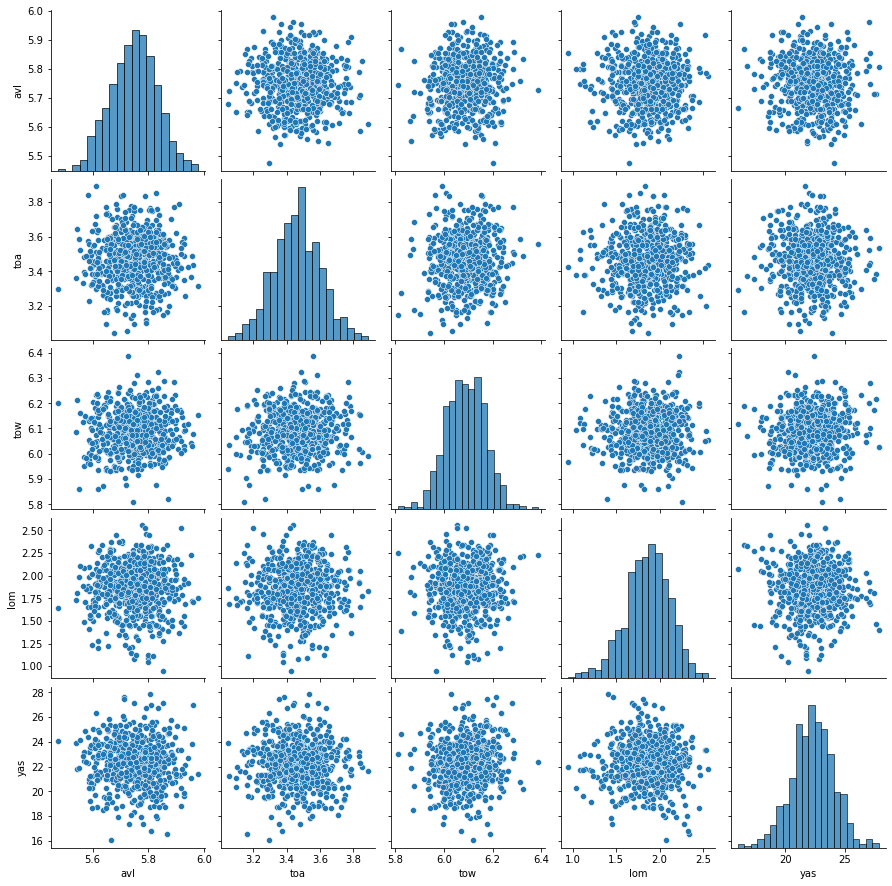

In [102]:
sns.pairplot(data1)

In [103]:
modelmul=smf.ols('yas~avl+toa+tow+lom',data=data1).fit()

In [104]:
modelmul.rsquared

0.010227637724196326

In [105]:
modelmul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.596
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.174
Time:                        21:59:30   Log-Likelihood:                -1246.0
No. Observations:                 623   AIC:                             2502.
Df Residuals:                     618   BIC:                             2524.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9580      7.337      2.448      0.015       3.550      32.366
avl           -1.1232      0.873     -1.287      0.199      -2.837       0.591
toa           -0.1492      0.501     -0.298      0.766      -1.133       0.835
tow            1.9100      0.886      2.155      0.032       0.170       3.650
lom           -0.1811      0.277     -0.654      0.513      -0.725       0.363
==============================================================================
Omnibus:                        3.914   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                4.370
Skew:                          -0.076   Prob(JB):                        0.112
Kurtosis:                       3.381   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
modelmul.params

Intercept    17.957971
avl          -1.123215
toa          -0.149167
tow           1.910023
lom          -0.181125
dtype: float64

In [107]:
modelmul.tvalues,np.round(modelmul.pvalues,5)

(Intercept    2.447601
 avl         -1.287080
 toa         -0.297626
 tow          2.155450
 lom         -0.654064
 dtype: float64,
 Intercept    0.01466
 avl          0.19855
 toa          0.76609
 tow          0.03151
 lom          0.51331
 dtype: float64)

In [108]:
modelmul.rsquared,modelmul.rsquared_adj

(0.010227637724196326, 0.0038213441172332274)

##### simple linear model

In [109]:
modeltoa=smf.ols('yas~toa',data=data1).fit()

In [110]:
modeltoa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05165
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.820
Time:                        21:59:31   Log-Likelihood:                -1249.1
No. Observations:                 623   AIC:                             2502.
Df Residuals:                     621   BIC:                             2511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6741      1.738     13.043      0.000      19.260      26.088
toa           -0.1140      0.502     -0.227      0.820      -1.100       0.871
==============================================================================
Omnibus:                        4.350   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.964
Skew:                          -0.082   Prob(JB):                       0.0836
Kurtosis:                       3.405   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
modellom=smf.ols('yas~lom',data=data1).fit()

In [112]:
modellom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3089
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.579
Time:                        21:59:31   Log-Likelihood:                -1249.0
No. Observations:                 623   AIC:                             2502.
Df Residuals:                     621   BIC:                             2511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5654      0.520     43.421      0.000      21.545      23.586
lom           -0.1541      0.277     -0.556      0.579      -0.698       0.390
==============================================================================
Omnibus:                        3.777   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                4.143
Skew:                          -0.080   Prob(JB):                        0.126
Kurtosis:                       3.366   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
modelall=smf.ols('yas~toa+lom',data=data1).fit()

In [114]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1760
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.839
Time:                        21:59:31   Log-Likelihood:                -1249.0
No. Observations:                 623   AIC:                             2504.
Df Residuals:                     620   BIC:                             2517.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9246      1.798     12.747      0.000      19.393      26.456
toa           -0.1048      0.502     -0.209      0.835      -1.091       0.882
lom           -0.1521      0.278     -0.548      0.584      -0.697       0.393
==============================================================================
Omnibus:                        3.837   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                4.223
Skew:                          -0.081   Prob(JB):                        0.121
Kurtosis:                       3.370   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### vif

In [115]:
data1.columns

Index(['avl', 'toa', 'tow', 'lom', 'yas'], dtype='object')

In [116]:
rs_avl=smf.ols('avl~toa+tow+lom',data=data1).fit().rsquared
vif_avl=1/(1-rs_avl)

rs_toa=smf.ols('toa~avl+tow+lom',data=data1).fit().rsquared
vif_toa=1/(1-rs_toa)

rs_tow=smf.ols('tow~avl+toa+lom',data=data1).fit().rsquared
vif_tow=1/(1-rs_tow)

rs_lom=smf.ols('lom~avl+toa+tow',data=data1).fit().rsquared
vif_lom=1/(1-rs_lom)

d1={'variables':['avl','toa','tow','lom'],'vif':[vif_avl,vif_toa,vif_tow,vif_lom]}
vif_frame=pd.DataFrame(d1)


In [117]:
vif_frame

,variables,vif
0,avl,1.002959
1,toa,1.002826
2,tow,1.005986
3,lom,1.002970


In [118]:
data1["yas"]-modelmul.predict(data1.iloc[:,[0,1,2,3]])

0      1.878174
1     -0.802680
2     -3.661731
3      1.049732
4     -0.068814
         ...   
618    1.273935
619    0.451177
620    2.230888
621   -0.434212
622   -2.497404
Length: 623, dtype: float64

In [119]:
modelmul.resid

0      1.878174
1     -0.802680
2     -3.661731
3      1.049732
4     -0.068814
         ...   
618    1.273935
619    0.451177
620    2.230888
621   -0.434212
622   -2.497404
Length: 623, dtype: float64

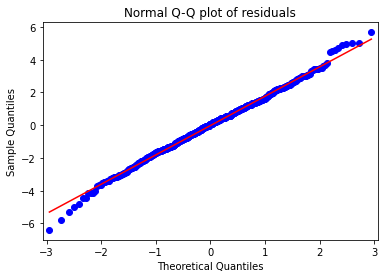

In [120]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelmul.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [121]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

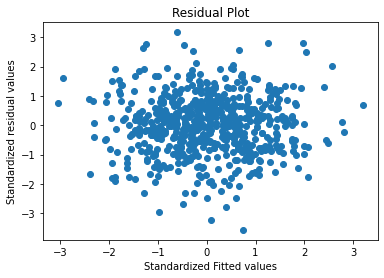

In [122]:
plt.scatter(get_standardized_values(modelmul.fittedvalues),
             get_standardized_values(modelmul.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [123]:
modelmul.fittedvalues

0      22.123873
1      22.268582
2      22.363062
3      22.353471
4      22.138151
         ...    
618    22.380806
619    22.246554
620    22.299007
621    22.291508
622    22.249604
Length: 623, dtype: float64

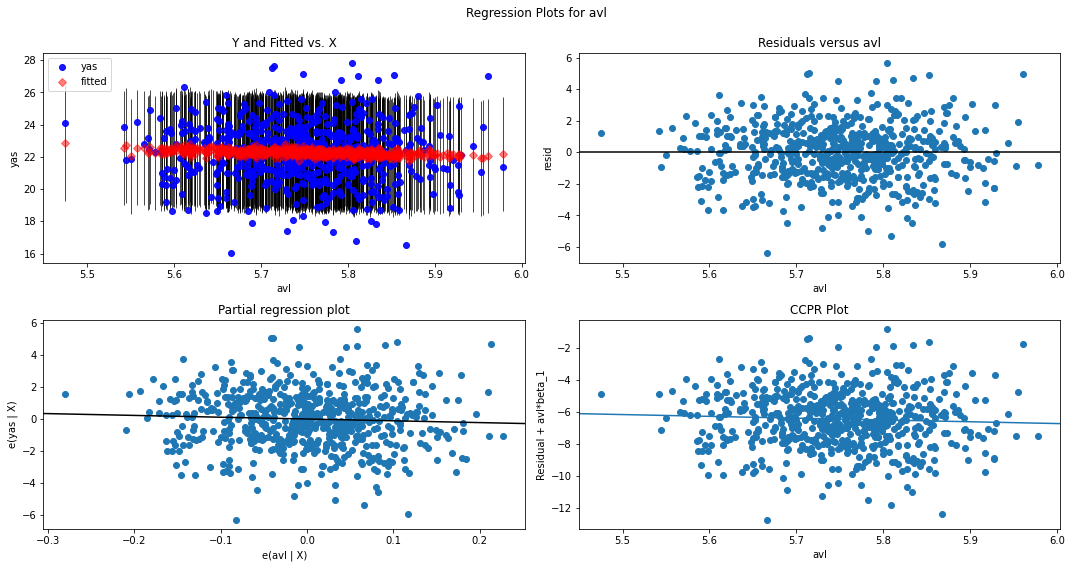

In [124]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"avl",fig=fig)



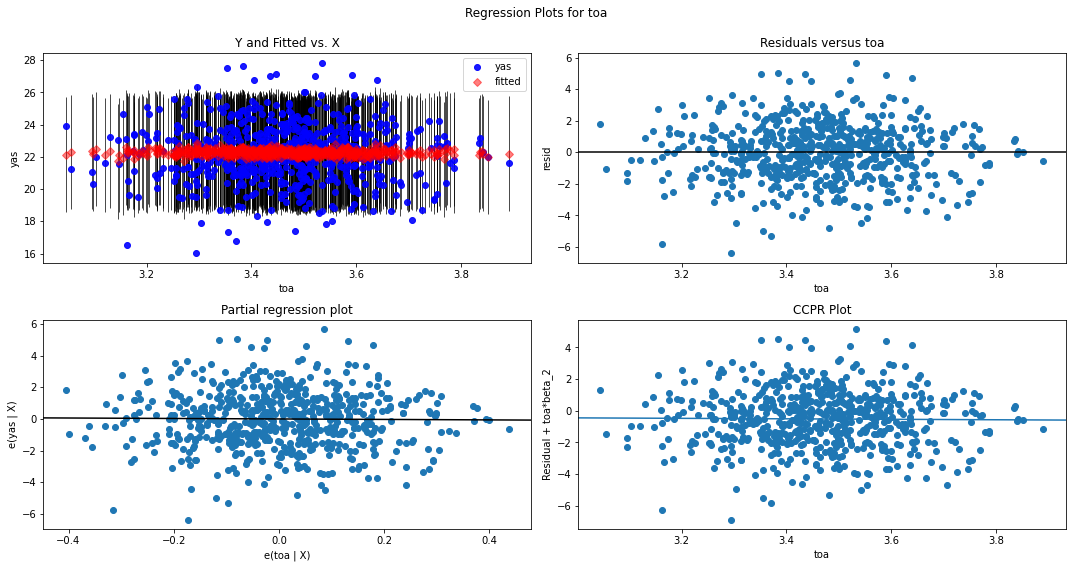

In [125]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"toa",fig=fig)


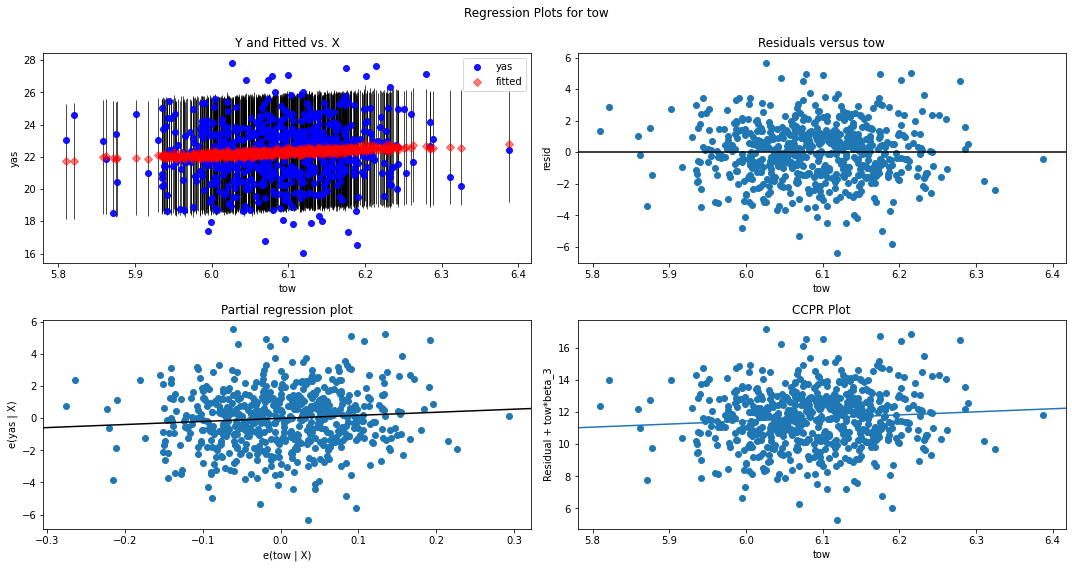

In [126]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"tow",fig=fig)



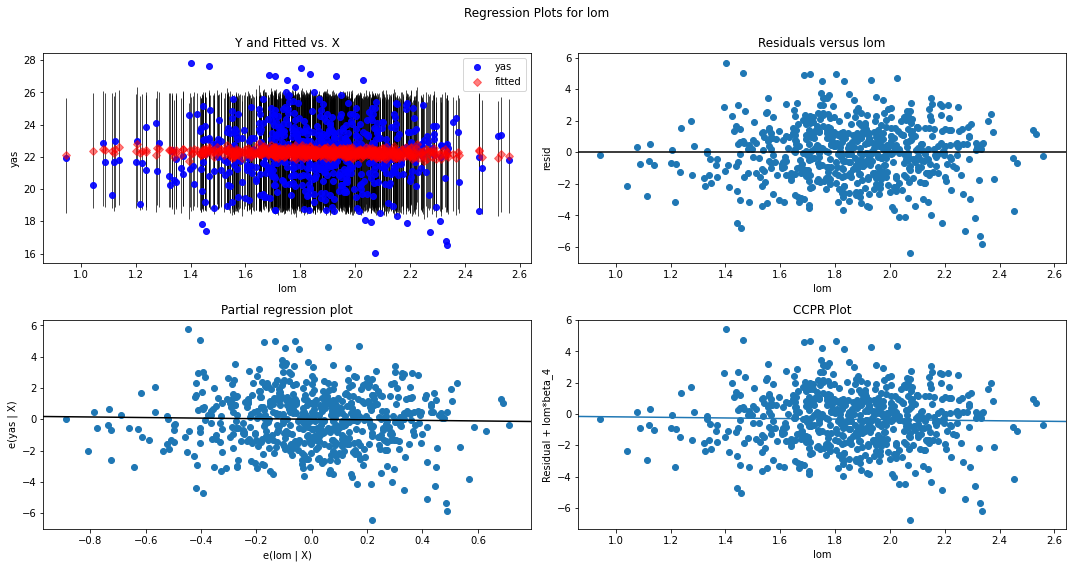

In [127]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"lom",fig=fig)


### model deletion diagnostics

In [128]:
model_influence = modelmul.get_influence()
(c, _) = model_influence.cooks_distance

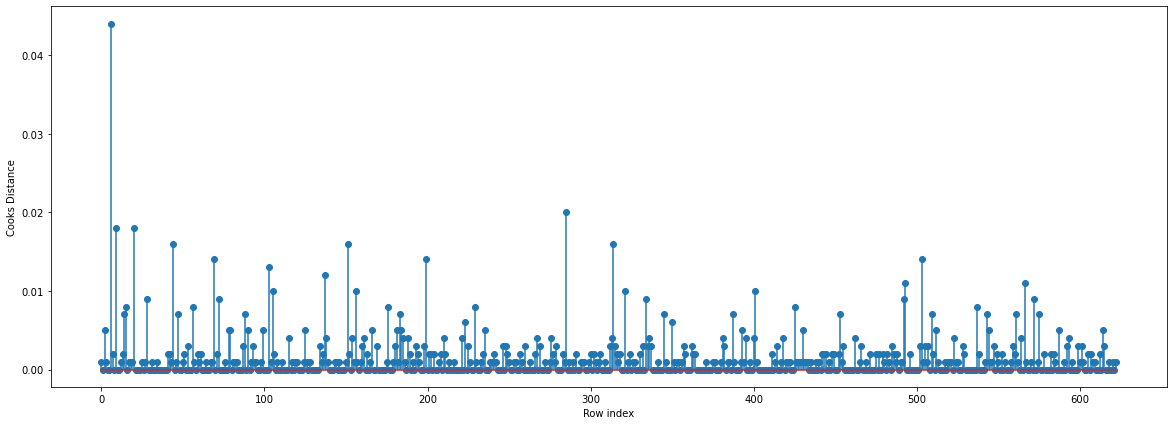

In [129]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [130]:
(np.argmax(c),np.max(c))

(6, 0.0437701177171452)

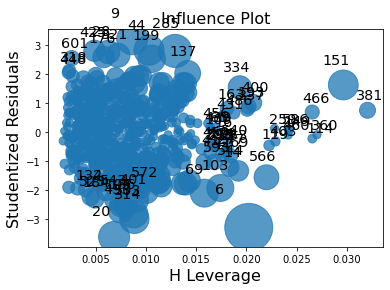

In [131]:
influence_plot(modelmul)
plt.show()

In [132]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1:]

In [133]:
finalmodel=smf.ols('yas~avl+toa+tow+lom',data=data1).fit()

In [134]:
predy=finalmodel.predict(x)

In [135]:
finalmodel.rsquared

0.010227637724196326

In [136]:
metrics.mean_absolute_percentage_error(predy,y)

0.06306540299720442

In [137]:
metrics.mean_absolute_error(predy,y)

1.4048541918745825